In [1]:
import pandas as pd
# Load the data
data = pd.read_csv("C:/Users/user/OneDrive/Desktop/analyasis.csv")

# Initial inspection to understand if segmentation is needed
print("Initial data overview:\n", data.head())

Initial data overview:
   Country Name Country Code  \
0        India          IND   
1        India          IND   
2        India          IND   
3        India          IND   
4        India          IND   

                                      Indicator Name     Indicator Code  1960  \
0  Internally displaced persons, total displaced ...        VC.IDP.TOCV   NaN   
1           Voice and Accountability: Standard Error         VA.STD.ERR   NaN   
2        Voice and Accountability: Number of Sources          VA.NO.SRC   NaN   
3  High-technology exports (% of manufactured exp...  TX.VAL.TECH.MF.ZS   NaN   
4                    Export value index (2015 = 100)  TX.VAL.MRCH.XD.WD   NaN   

   1961  1962  1963  1964  1965  ...           2014           2015  \
0   NaN   NaN   NaN   NaN   NaN  ...  854000.000000  612000.000000   
1   NaN   NaN   NaN   NaN   NaN  ...       0.127573       0.129731   
2   NaN   NaN   NaN   NaN   NaN  ...      13.000000      13.000000   
3   NaN   NaN   NaN   

In [2]:
print(data.columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')


In [3]:
# Step 2: Filter Data for India
# We are focusing on the data for India
india_data = data[data['Country Name'] == 'India']

In [4]:
# Step 3: Select Relevant Indicators
# Define a list of indicators relevant to the online vehicle booking market
relevant_indicators = [
    "GDP per capita (current US$)",
    "Mobile cellular subscriptions (per 100 people)",
    "Internet users (% of population)",
    "Urban population (% of total population)"
]

# Filter the data for relevant indicators
filtered_data = india_data[india_data['Indicator Name'].isin(relevant_indicators)]

Available columns before renaming: Index(['Urban Population', 'Mobile Subscriptions', 'GDP per capita'], dtype='object', name='Indicator Name')
Renamed columns: Index(['Urban Population', 'Mobile Subscriptions', 'GDP per capita'], dtype='object', name='Indicator Name')


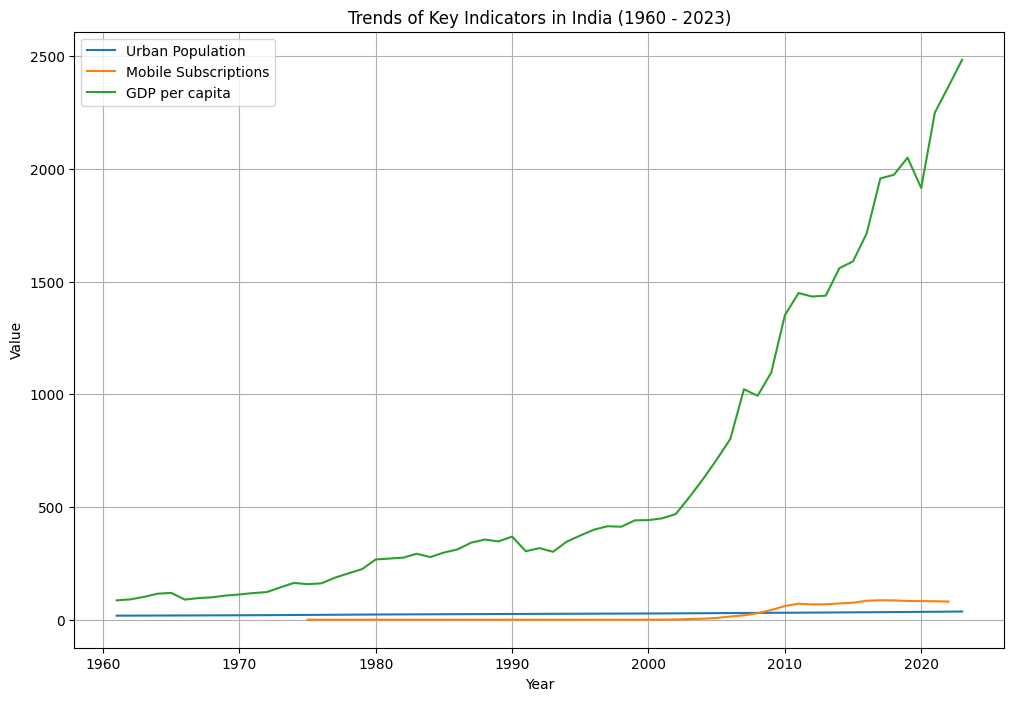

In [7]:
import matplotlib.pyplot as plt

# Check the existing columns before renaming
print("Available columns before renaming:", yearly_data.columns)

# Correct the renaming based on the actual number of columns
# Define the new column names based on the available indicators
expected_indicators = [
    "GDP per capita (current US$)",
    "Mobile cellular subscriptions (per 100 people)",
    "Internet users (% of population)",
    "Urban population (% of total population)"
]

# Filter the relevant indicators present in the dataset
present_indicators = [
    indicator for indicator in expected_indicators if indicator in yearly_data.columns
]

# Creating a dictionary to rename columns
rename_dict = {
    "GDP per capita (current US$)": "GDP per capita",
    "Mobile cellular subscriptions (per 100 people)": "Mobile Subscriptions",
    "Internet users (% of population)": "Internet Users",
    "Urban population (% of total population)": "Urban Population"
}

# Renaming columns based on available indicators
yearly_data = yearly_data.rename(columns=rename_dict)

print("Renamed columns:", yearly_data.columns)

# Proceeding with visualization if the columns are correctly renamed
if len(yearly_data.columns) > 1:
    plt.figure(figsize=(12, 8))
    for column in yearly_data.columns:
        plt.plot(yearly_data.index, yearly_data[column], label=column)

    plt.title("Trends of Key Indicators in India (1960 - 2023)")
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("Not enough data for visualization. Please check the dataset for missing indicators.")


Correlation Matrix:
 Indicator Name        Urban Population  Mobile Subscriptions  GDP per capita
Indicator Name                                                              
Urban Population              1.000000              0.857392        0.908819
Mobile Subscriptions          0.857392              1.000000        0.971266
GDP per capita                0.908819              0.971266        1.000000


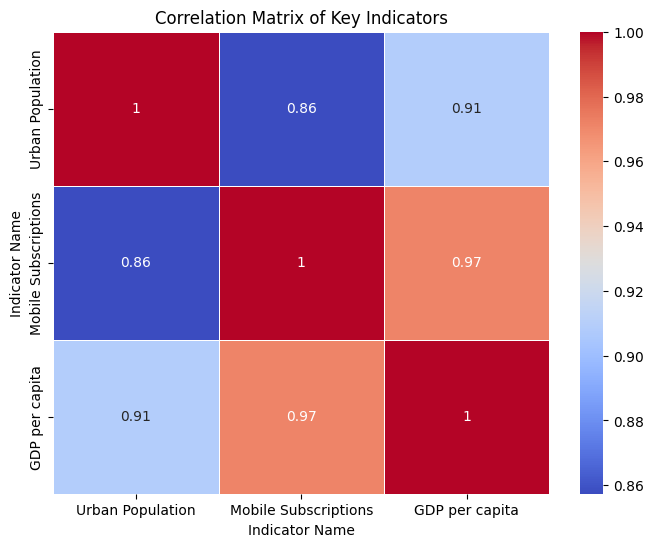

In [8]:
# Correlation matrix
correlation_matrix = yearly_data.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Visualizing the correlation matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Key Indicators")
plt.show()


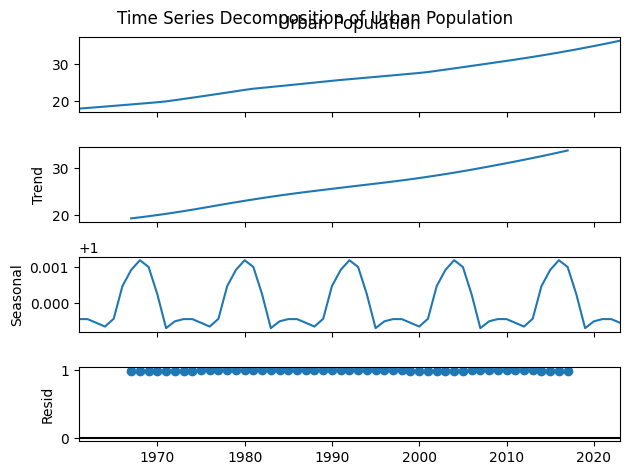

ValueError: This function does not handle missing values

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

for column in yearly_data.columns:
    decomposition = seasonal_decompose(yearly_data[column], model='multiplicative', period=12)
    decomposition.plot()
    plt.suptitle(f"Time Series Decomposition of {column}")
    plt.show()


In [10]:
# Fill missing values using interpolation
yearly_data = yearly_data.interpolate()

# Alternatively, you can use forward fill or backward fill
# yearly_data = yearly_data.fillna(method='ffill')  # Forward fill
# yearly_data = yearly_data.fillna(method='bfill')  # Backward fill


In [11]:
# Drop rows with any missing values
yearly_data = yearly_data.dropna()


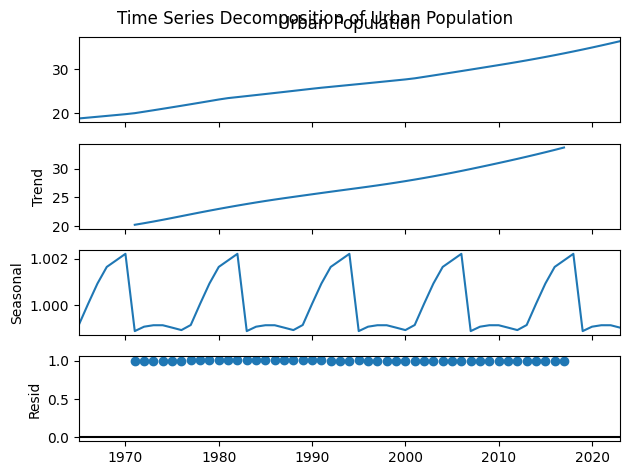

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Fill missing values using interpolation
yearly_data = yearly_data.interpolate()

# Time Series Decomposition
for column in yearly_data.columns:
    decomposition = seasonal_decompose(yearly_data[column], model='multiplicative', period=12)
    decomposition.plot()
    plt.suptitle(f"Time Series Decomposition of {column}")
    plt.show()


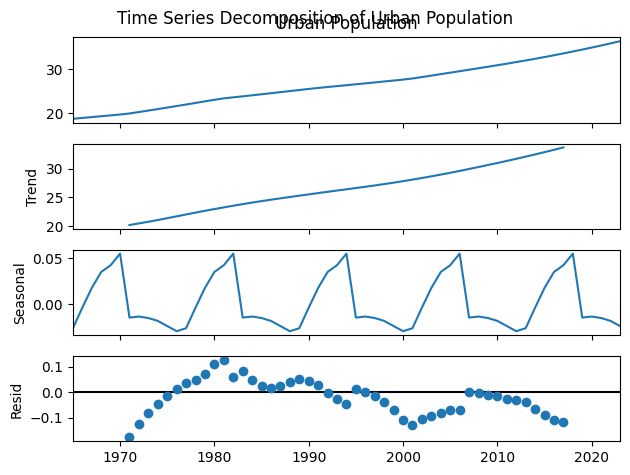

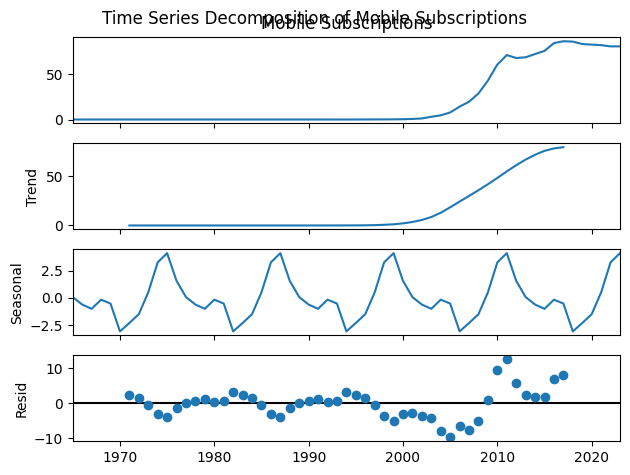

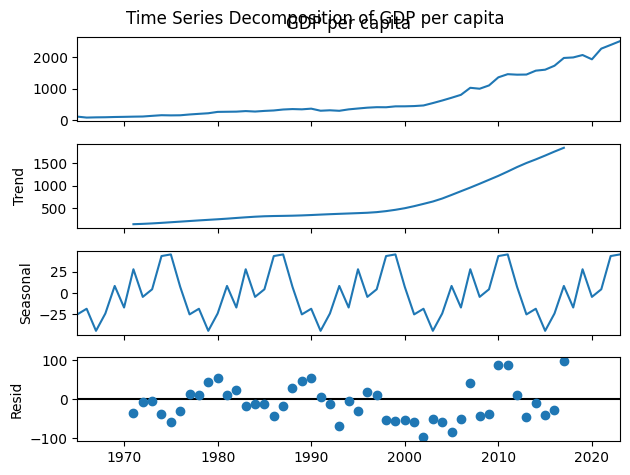

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Fill missing values using interpolation
yearly_data = yearly_data.interpolate()

# Time Series Decomposition using additive model
for column in yearly_data.columns:
    decomposition = seasonal_decompose(yearly_data[column], model='additive', period=12)
    decomposition.plot()
    plt.suptitle(f"Time Series Decomposition of {column}")
    plt.show()


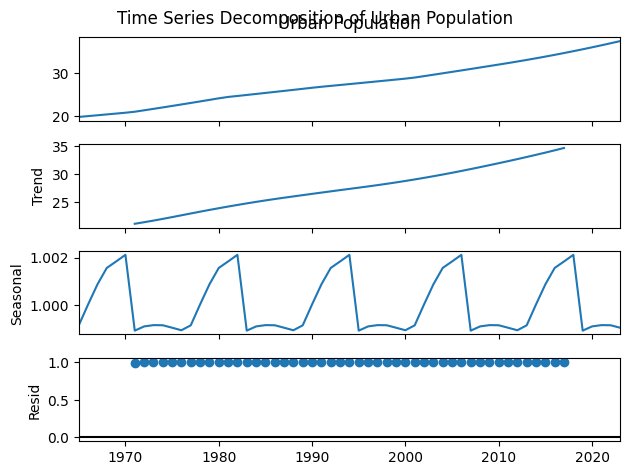

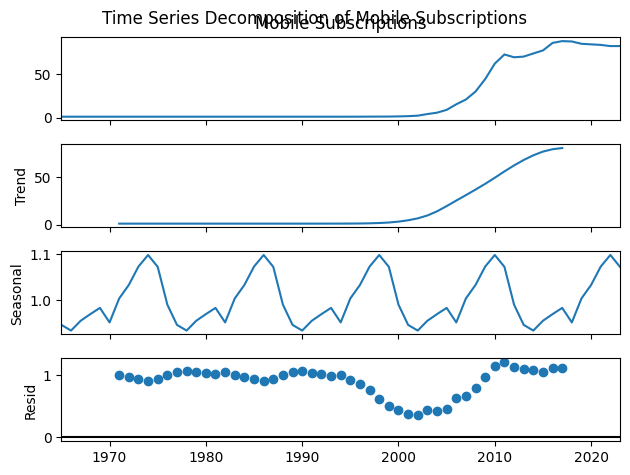

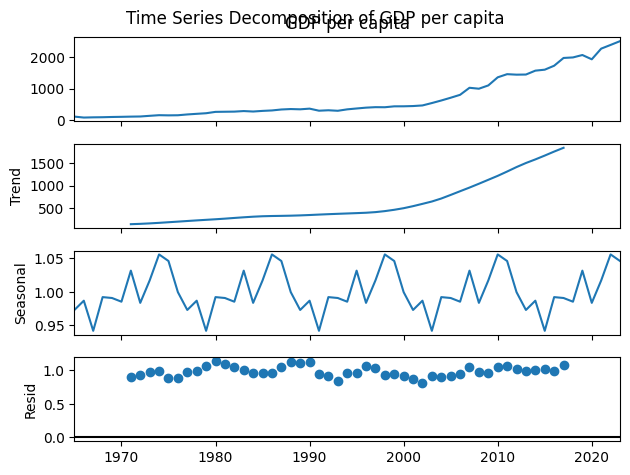

In [14]:
# Add a constant to shift all values to be positive (e.g., add 1 or a larger number)
yearly_data = yearly_data + 1  # This adds 1 to all values

# Time Series Decomposition using multiplicative model
for column in yearly_data.columns:
    decomposition = seasonal_decompose(yearly_data[column], model='multiplicative', period=12)
    decomposition.plot()
    plt.suptitle(f"Time Series Decomposition of {column}")
    plt.show()


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\sit

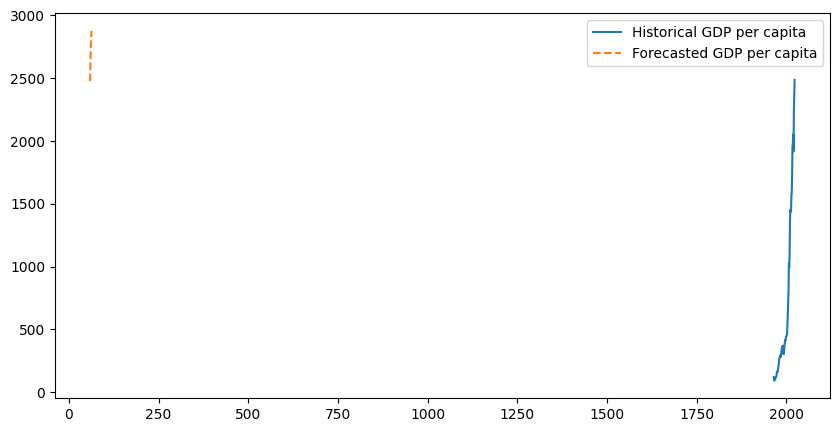

In [16]:
from statsmodels.tsa.arima.model import ARIMA

# Example: Forecasting GDP per capita
gdp_data = yearly_data['GDP per capita'].dropna()
model = ARIMA(gdp_data, order=(5, 1, 0))  # (p, d, q) order
model_fit = model.fit()
forecast = model_fit.forecast(steps=5)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(gdp_data, label='Historical GDP per capita')
plt.plot(range(len(gdp_data), len(gdp_data) + 5), forecast, label='Forecasted GDP per capita', linestyle='--')
plt.legend()
plt.show()

In [17]:
# Example hypothesis: Growth in internet users over the years might influence online vehicle bookings

# Assuming you have a `vehicle_bookings_df` with a `year` and `number_of_bookings` column
internet_users = yearly_data['Internet Users'].dropna()
years = internet_users.index.intersection(vehicle_bookings_df['year'])

plt.figure(figsize=(10, 6))
plt.plot(years, internet_users[years], label='Internet Users (% of Population)')
plt.plot(years, vehicle_bookings_df.set_index('year').loc[years]['number_of_bookings'], label='Number of Online Bookings')
plt.legend()
plt.title("Impact of Internet Growth on Online Vehicle Bookings")
plt.show()


KeyError: 'Internet Users'

In [27]:
import pandas as pd

# Load the dataset
vehicle_data = pd.read_csv("C:/Users/user/OneDrive/Desktop/Vehicle_Reg_2019.csv")

# Display the first few rows of the dataset
print(vehicle_data.head())


                                     Description  Year  Month  Count
0  MOPED/SCOOTER                                     1   2019   6460
1  MOPED/SCOOTER                                     2   2019   4826
2  MOPED/SCOOTER                                     3   2019   4883
3  MOPED/SCOOTER                                     4   2019   4955
4  MOPED/SCOOTER                                     5   2019   6657


In [28]:
# Check for missing values
print(vehicle_data.isnull().sum())

# Check data types
print(vehicle_data.dtypes)


Description    0
Year           0
Month          0
Count          0
dtype: int64
Description    object
Year            int64
Month           int64
Count           int64
dtype: object


In [31]:
# Convert Year and Month into a single DateTime column with valid days
vehicle_data['Date'] = pd.to_datetime(vehicle_data['Year'].astype(str) + '-' + 
                                        vehicle_data['Month'].astype(str).str.zfill(2) + '-01', 
                                        errors='coerce')

# Check the conversion
print(vehicle_data.head())


                                     Description  Year  Month  Count Date
0  MOPED/SCOOTER                                     1   2019   6460  NaT
1  MOPED/SCOOTER                                     2   2019   4826  NaT
2  MOPED/SCOOTER                                     3   2019   4883  NaT
3  MOPED/SCOOTER                                     4   2019   4955  NaT
4  MOPED/SCOOTER                                     5   2019   6657  NaT


C:\Users\user\AppData\Local\Temp\ipykernel_13128\1030338355.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  vehicle_data['Date'] = pd.to_datetime(vehicle_data['Year'].astype(str) + '-' +


In [32]:
# Aggregate data by vehicle type and year
vehicle_type_count = vehicle_data.groupby(['Description', 'Year'])['Count'].sum().reset_index()

# Check the aggregated data
print(vehicle_type_count.head())


  Description  Year  Count
0   AMBULANCE     2      1
1   AMBULANCE     4      2
2   AMBULANCE     5      2
3   AMBULANCE     6      2
4   AMBULANCE     8      1


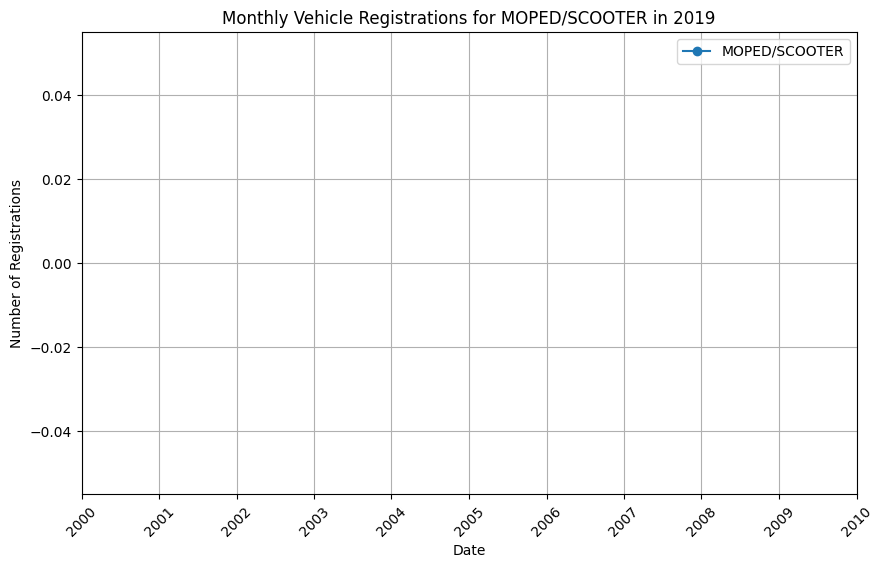

In [33]:
import matplotlib.pyplot as plt

# Plotting the total vehicle registrations over time for a specific type (e.g., MOPED/SCOOTER)
vehicle_type = 'MOPED/SCOOTER'
vehicle_data_filtered = vehicle_data[vehicle_data['Description'] == vehicle_type]

plt.figure(figsize=(10, 6))
plt.plot(vehicle_data_filtered['Date'], vehicle_data_filtered['Count'], marker='o', label=vehicle_type)
plt.title(f"Monthly Vehicle Registrations for {vehicle_type} in 2019")
plt.xlabel('Date')
plt.ylabel('Number of Registrations')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()


Aggregated Data:
Empty DataFrame
Columns: [Year, Month, Count]
Index: []

Merged Data:
Empty DataFrame
Columns: [Year, Month, Count, Population]
Index: []


C:\Users\user\AppData\Local\Temp\ipykernel_13128\1900117543.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  vehicle_data['Date'] = pd.to_datetime(vehicle_data['Year'].astype(str) + '-' + vehicle_data['Month'].astype(str).str.zfill(2) + '-01', errors='coerce')
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


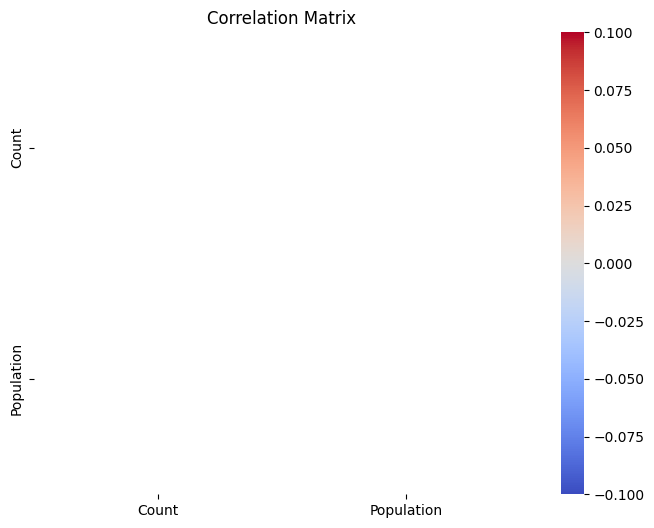

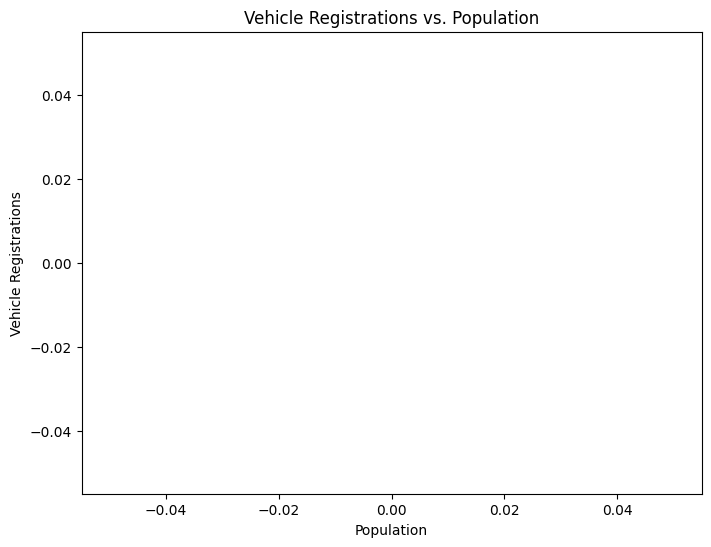

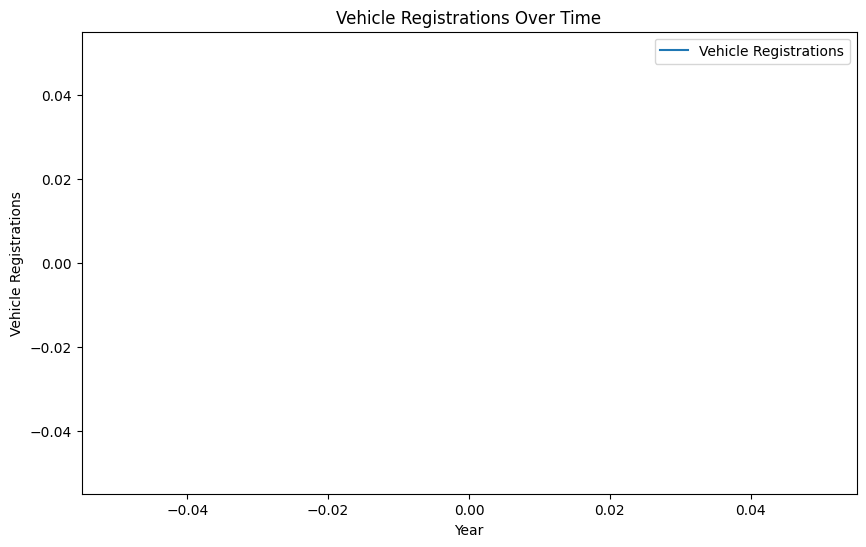

ValueError: x and y must have length at least 2.

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load the dataset
vehicle_data = pd.read_csv("C:/Users/user/OneDrive/Desktop/Vehicle_Reg_2019.csv")

# Data Cleaning
# Convert Year and Month into a single DateTime column
vehicle_data['Date'] = pd.to_datetime(vehicle_data['Year'].astype(str) + '-' + vehicle_data['Month'].astype(str).str.zfill(2) + '-01', errors='coerce')

# Drop rows with invalid Date
vehicle_data = vehicle_data.dropna(subset=['Date'])

# Aggregating vehicle registrations by Year and Month
monthly_registrations = vehicle_data.groupby(['Year', 'Month'])['Count'].sum().reset_index()

# Optionally, create a time-based index for trend analysis
monthly_registrations['Date'] = pd.to_datetime(monthly_registrations[['Year', 'Month']].assign(DAY=1))
monthly_registrations.set_index('Date', inplace=True)

# Check the aggregated data
print("Aggregated Data:")
print(monthly_registrations.head())

# Example of external data (e.g., population, GDP) for merging
external_data = pd.DataFrame({
    'Year': [2019, 2020, 2021],  # Example years
    'Population': [100000, 102000, 105000],  # Example population data
})

# Merging external data (e.g., population) with vehicle data
merged_data = pd.merge(monthly_registrations, external_data, on='Year', how='left')

# Check the merged data
print("\nMerged Data:")
print(merged_data.head())

# 1. **Correlation Matrix**
# Compute and plot the correlation matrix
correlation_matrix = merged_data[['Count', 'Population']].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 2. **Scatter Plot: Vehicle Registrations vs. Population**
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_data, x='Population', y='Count')
plt.title('Vehicle Registrations vs. Population')
plt.xlabel('Population')
plt.ylabel('Vehicle Registrations')
plt.show()

# 3. **Time Series Plot: Registrations Over Time**
plt.figure(figsize=(10, 6))
plt.plot(merged_data.index, merged_data['Count'], label='Vehicle Registrations')
plt.title('Vehicle Registrations Over Time')
plt.xlabel('Year')
plt.ylabel('Vehicle Registrations')
plt.legend()
plt.show()

# 4. **Pearson Correlation Coefficient**
corr, _ = pearsonr(merged_data['Count'], merged_data['Population'])
print(f'\nPearson correlation coefficient between vehicle registrations and population: {corr:.2f}')

# Optional: Additional statistical analysis, for example, regression or machine learning, can follow


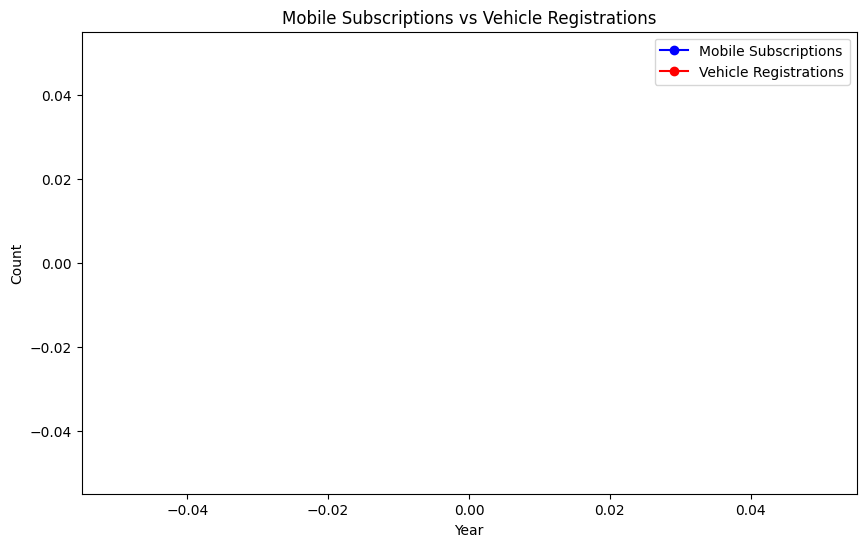

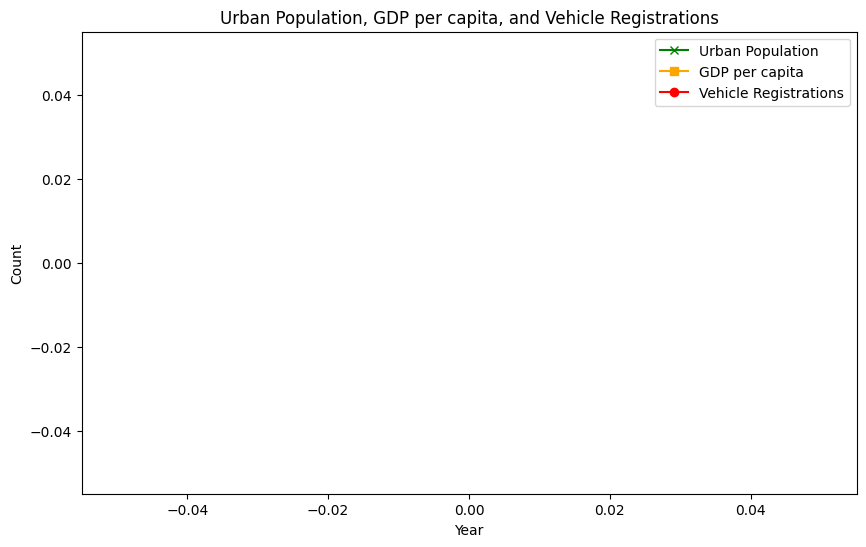

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'vehicle_data' is already loaded from 'Vehicle_Reg_2019.csv'
# Clean the data (drop missing values)
mobile_subscriptions = yearly_data['Mobile Subscriptions'].dropna()
urban_population = yearly_data['Urban Population'].dropna()
gdp_per_capita = yearly_data['GDP per capita'].dropna()

# Align data based on the years of interest (intersection of years in both datasets)
years = mobile_subscriptions.index.intersection(vehicle_data['Year'])

# Subset the data based on the aligned years
aligned_mobile_subscriptions = mobile_subscriptions[years]
aligned_vehicle_registrations = vehicle_data[vehicle_data['Year'].isin(years)]['Count']

# Optional: Ensure urban_population and gdp_per_capita are also aligned by 'years' if needed
aligned_urban_population = urban_population[years]
aligned_gdp_per_capita = gdp_per_capita[years]

# Plotting Mobile Subscriptions vs Vehicle Registrations
plt.figure(figsize=(10, 6))

# Plot mobile subscriptions
plt.plot(aligned_mobile_subscriptions, label='Mobile Subscriptions', color='blue', marker='o')

# Plot vehicle registrations
plt.plot(aligned_vehicle_registrations, label='Vehicle Registrations', color='red', marker='o')

# Adding titles and labels
plt.title('Mobile Subscriptions vs Vehicle Registrations')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()

# Show the plot
plt.show()

# Optional: Plotting Urban Population and GDP per capita with vehicle registrations for comparison
plt.figure(figsize=(10, 6))

# Plot urban population
plt.plot(aligned_urban_population, label='Urban Population', color='green', marker='x')

# Plot GDP per capita
plt.plot(aligned_gdp_per_capita, label='GDP per capita', color='orange', marker='s')

# Plot vehicle registrations again for comparison
plt.plot(aligned_vehicle_registrations, label='Vehicle Registrations', color='red', marker='o')

# Adding titles and labels
plt.title('Urban Population, GDP per capita, and Vehicle Registrations')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()

# Show the plot
plt.show()


In [38]:
print("Mobile Subscriptions Years:", mobile_subscriptions.index.unique())
print("Vehicle Registration Years:", vehicle_data['Year'].unique())


Mobile Subscriptions Years: Index([1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype='int32')
Vehicle Registration Years: []


In [39]:
years = mobile_subscriptions.index.intersection(vehicle_data['Year'])
print("Common Years:", years)


Common Years: Index([], dtype='int64')


In [40]:
print("Missing values in Mobile Subscriptions:", mobile_subscriptions.isna().sum())
print("Missing values in Vehicle Registrations:", vehicle_data['Count'].isna().sum())


Missing values in Mobile Subscriptions: 0
Missing values in Vehicle Registrations: 0


In [41]:
print(vehicle_data.dtypes)


Description            object
Year                    int64
Month                   int64
Count                   int64
Date           datetime64[ns]
dtype: object


Mobile Subscriptions Years: Index([1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype='int32')
Vehicle Registration Years: []
Common Years: Index([], dtype='int64')
Missing values in Mobile Subscriptions: 0
Missing values in Vehicle Registrations: 0


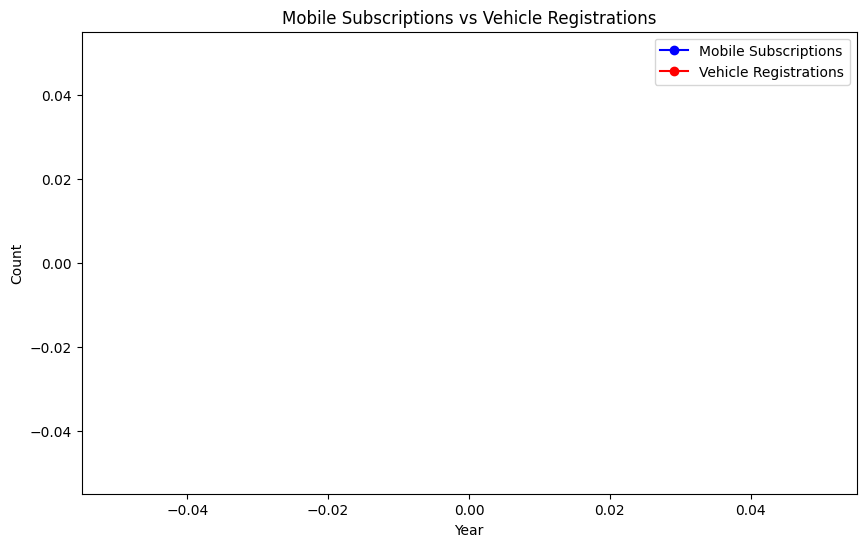

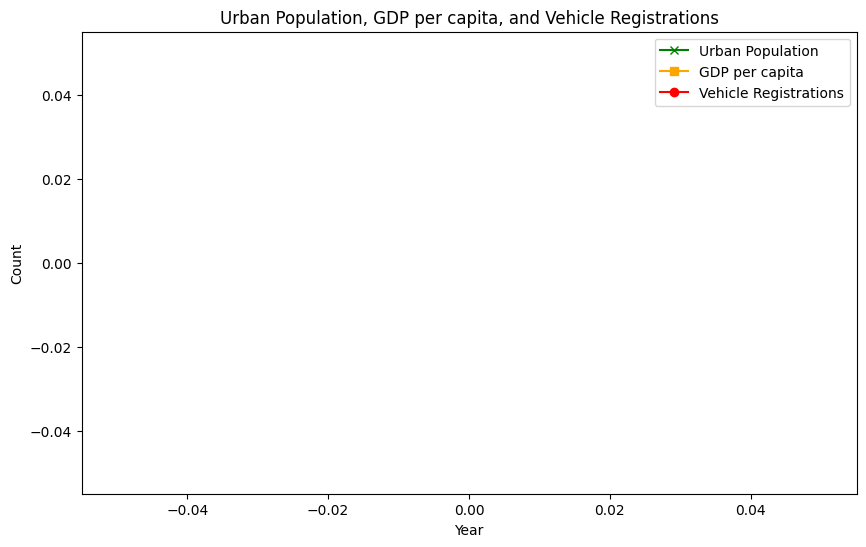

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'vehicle_data' is already loaded from 'Vehicle_Reg_2019.csv'
# Clean the data (drop missing values)
mobile_subscriptions = yearly_data['Mobile Subscriptions'].dropna()
urban_population = yearly_data['Urban Population'].dropna()
gdp_per_capita = yearly_data['GDP per capita'].dropna()

# Check unique years in both datasets
print("Mobile Subscriptions Years:", mobile_subscriptions.index.unique())
print("Vehicle Registration Years:", vehicle_data['Year'].unique())

# Align data based on the years of interest (intersection of years in both datasets)
years = mobile_subscriptions.index.intersection(vehicle_data['Year'])
print("Common Years:", years)

# Subset the data based on the aligned years
aligned_mobile_subscriptions = mobile_subscriptions[years]
aligned_vehicle_registrations = vehicle_data[vehicle_data['Year'].isin(years)]['Count']

# Check for missing values
print("Missing values in Mobile Subscriptions:", aligned_mobile_subscriptions.isna().sum())
print("Missing values in Vehicle Registrations:", aligned_vehicle_registrations.isna().sum())

# Optional: Ensure urban_population and gdp_per_capita are also aligned by 'years' if needed
aligned_urban_population = urban_population[years]
aligned_gdp_per_capita = gdp_per_capita[years]

# Plotting Mobile Subscriptions vs Vehicle Registrations
plt.figure(figsize=(10, 6))

# Plot mobile subscriptions
plt.plot(aligned_mobile_subscriptions, label='Mobile Subscriptions', color='blue', marker='o')

# Plot vehicle registrations
plt.plot(aligned_vehicle_registrations, label='Vehicle Registrations', color='red', marker='o')

# Adding titles and labels
plt.title('Mobile Subscriptions vs Vehicle Registrations')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()

# Show the plot
plt.show()

# Optional: Plotting Urban Population and GDP per capita with vehicle registrations for comparison
plt.figure(figsize=(10, 6))

# Plot urban population
plt.plot(aligned_urban_population, label='Urban Population', color='green', marker='x')

# Plot GDP per capita
plt.plot(aligned_gdp_per_capita, label='GDP per capita', color='orange', marker='s')

# Plot vehicle registrations again for comparison
plt.plot(aligned_vehicle_registrations, label='Vehicle Registrations', color='red', marker='o')

# Adding titles and labels
plt.title('Urban Population, GDP per capita, and Vehicle Registrations')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()

# Show the plot
plt.show()
